In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import cv2

BASE_TRAIN_DATA_PATH = 'C:/Users/Patrik/Desktop/airsynth_data/keypoints/Keypoints_FreiHAND/training'
TRAIN_IMAGES_PATH = os.path.join(BASE_TRAIN_DATA_PATH, 'rgb')
TRAIN_XYZ_PATH = 'C:/Users/Patrik/Desktop/airsynth_data/keypoints/Keypoints_FreiHAND/training_xyz.json'
TRAIN_K_PATH = 'C:/Users/Patrik/Desktop/airsynth_data/keypoints/Keypoints_FreiHAND/training_K.json'
BASE_DATA_PATH = 'C:/Users/Patrik/Desktop/airsynth_data/keypoints'

all_img_paths = os.listdir(TRAIN_IMAGES_PATH)
num_train_images = len(all_img_paths)
print("Num train images:", num_train_images)


Num train images: 130240


In [2]:
def load_json_file(path):
    with open(path, 'r') as json_file:
        return json.load(json_file)

xyz_train_data = load_json_file(TRAIN_XYZ_PATH)
k_train_data = load_json_file(TRAIN_K_PATH)
first_xyz = xyz_train_data[5]
first_k = k_train_data[5]
assert len(xyz_train_data) == len(k_train_data)
zipped_data = zip(xyz_train_data, k_train_data)

In [3]:
first_xyz, frist_k = next(zipped_data)
first_xyz, first_k = [np.array(x) for x in [first_xyz, first_k]]
print(first_xyz)
print(first_k)

def projectPoints(xyz, k):
    """ Project 3D coordinates into image space. """
    xyz = np.array(xyz)
    K = np.array(k)
    uv = np.matmul(K, xyz.T).T
    return uv[:, :2] / uv[:, -1:]

uv = projectPoints(first_xyz, first_k)

[[ 2.94020474e-02 -2.79202070e-02  5.87080777e-01]
 [ 5.14083356e-03 -4.41455059e-02  6.14191234e-01]
 [-1.00676827e-02 -4.51544002e-02  6.40246749e-01]
 [-2.94562913e-02 -3.15503031e-02  6.54669166e-01]
 [-5.71397543e-02 -1.37670822e-02  6.73146725e-01]
 [-1.75007507e-02 -1.14277191e-02  6.68747604e-01]
 [-3.55099104e-02 -2.55264342e-04  6.96573377e-01]
 [-5.06246164e-02  7.31039420e-03  7.13747144e-01]
 [-6.24611937e-02  1.97279602e-02  7.35531926e-01]
 [-2.52512954e-02  1.21667907e-02  6.61927342e-01]
 [-4.46368605e-02  2.85896845e-02  6.84188426e-01]
 [-6.03772625e-02  4.08738665e-02  6.99166715e-01]
 [-7.04898685e-02  5.92771359e-02  7.18463302e-01]
 [-2.69569382e-02  2.47983001e-02  6.37396395e-01]
 [-4.51128557e-02  3.72715928e-02  6.59627914e-01]
 [-6.21648133e-02  5.01774959e-02  6.75231814e-01]
 [-7.63923228e-02  6.42127544e-02  6.95233941e-01]
 [-2.95245834e-02  3.07632871e-02  6.16291225e-01]
 [-4.41889204e-02  4.51894589e-02  6.26619875e-01]
 [-5.74844703e-02  5.76197840e-

In [4]:
def plot_hand(axis, coords_hw, vis=None, color_fixed=None, linewidth='1', order='hw', draw_kp=True):
    """ Plots a hand stick figure into a matplotlib figure. """
    if order == 'uv':
        coords_hw = coords_hw[:, ::-1]

    colors = np.array([[0.4, 0.4, 0.4],
                       [0.4, 0.0, 0.0],
                       [0.6, 0.0, 0.0],
                       [0.8, 0.0, 0.0],
                       [1.0, 0.0, 0.0],
                       [0.4, 0.4, 0.0],
                       [0.6, 0.6, 0.0],
                       [0.8, 0.8, 0.0],
                       [1.0, 1.0, 0.0],
                       [0.0, 0.4, 0.2],
                       [0.0, 0.6, 0.3],
                       [0.0, 0.8, 0.4],
                       [0.0, 1.0, 0.5],
                       [0.0, 0.2, 0.4],
                       [0.0, 0.3, 0.6],
                       [0.0, 0.4, 0.8],
                       [0.0, 0.5, 1.0],
                       [0.4, 0.0, 0.4],
                       [0.6, 0.0, 0.6],
                       [0.7, 0.0, 0.8],
                       [1.0, 0.0, 1.0]])

    colors = colors[:, ::-1]

    # define connections and colors of the bones
    bones = [((0, 1), colors[1, :]),
             ((1, 2), colors[2, :]),
             ((2, 3), colors[3, :]),
             ((3, 4), colors[4, :]),

             ((0, 5), colors[5, :]),
             ((5, 6), colors[6, :]),
             ((6, 7), colors[7, :]),
             ((7, 8), colors[8, :]),

             ((0, 9), colors[9, :]),
             ((9, 10), colors[10, :]),
             ((10, 11), colors[11, :]),
             ((11, 12), colors[12, :]),

             ((0, 13), colors[13, :]),
             ((13, 14), colors[14, :]),
             ((14, 15), colors[15, :]),
             ((15, 16), colors[16, :]),

             ((0, 17), colors[17, :]),
             ((17, 18), colors[18, :]),
             ((18, 19), colors[19, :]),
             ((19, 20), colors[20, :])]

    if vis is None:
        vis = np.ones_like(coords_hw[:, 0]) == 1.0

    for connection, color in bones:
        if (vis[connection[0]] == False) or (vis[connection[1]] == False):
            continue


        coord1 = coords_hw[connection[0], :]
        coord2 = coords_hw[connection[1], :]
        coords = np.stack([coord1, coord2])
        if color_fixed is None:
            axis.plot(coords[:, 1], coords[:, 0], color=color, linewidth=linewidth)
        else:
            axis.plot(coords[:, 1], coords[:, 0], color_fixed, linewidth=linewidth)

    if not draw_kp:
        return

    for i in range(21):
        if vis[i] > 0.5:
            axis.plot(coords_hw[i, 1], coords_hw[i, 0], 'o', color=colors[i, :])

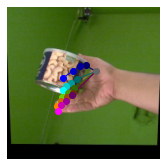

In [18]:
test_img_path = all_img_paths[5]
full_test_img_path = os.path.join(TRAIN_IMAGES_PATH, test_img_path)
img = mpimg.imread(full_test_img_path)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(img)
plot_hand(ax1, uv, order='uv')
ax1.axis('off')
plt.show()

In [23]:
total_unique_data = len(xyz_train_data)
unique_repeat = num_train_images // total_unique_data
keypoints = {}
for i in range(unique_repeat):
    zipped_data = zip(xyz_train_data, k_train_data)
    for n, (xyz, k) in enumerate(zipped_data):
        uv = projectPoints(xyz, k)
        curr_img_name = all_img_paths[i * total_unique_data + n]
        keypoints[curr_img_name] = uv

SAVE_FILENAME = 'train_2d_keypoints.npz'
np.savez(SAVE_FILENAME, **keypoints)
print('Training keypoints saved to file', SAVE_FILENAME)

Training keypoints saved to file train_2d_keypoints.npz


In [29]:
def plot_hand_for_test(img, coords):
    colors = np.array([[0.4, 0.4, 0.4],
                       [0.4, 0.0, 0.0],
                       [0.6, 0.0, 0.0],
                       [0.8, 0.0, 0.0],
                       [1.0, 0.0, 0.0],
                       [0.4, 0.4, 0.0],
                       [0.6, 0.6, 0.0],
                       [0.8, 0.8, 0.0],
                       [1.0, 1.0, 0.0],
                       [0.0, 0.4, 0.2],
                       [0.0, 0.6, 0.3],
                       [0.0, 0.8, 0.4],
                       [0.0, 1.0, 0.5],
                       [0.0, 0.2, 0.4],
                       [0.0, 0.3, 0.6],
                       [0.0, 0.4, 0.8],
                       [0.0, 0.5, 1.0],
                       [0.4, 0.0, 0.4],
                       [0.6, 0.0, 0.6],
                       [0.7, 0.0, 0.8],
                       [1.0, 0.0, 1.0]])

    colors = colors[:, ::-1]

    # cv2.circle(img, (int(coords[0]), int(coords[1])), 2, colors[0], thickness=1)
    for i, coord in enumerate(coords):
        cv2.circle(img, (int(coord[0]), int(coord[1])), 2, colors[i], thickness=1)

0
1
2
3


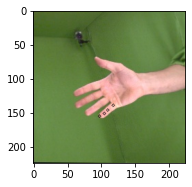

In [50]:
SAVE_FILENAME = 'train_2d_keypoints.npz'
npz_file = np.load(SAVE_FILENAME, allow_pickle=True)
INDEX = 23
img_name = all_img_paths[INDEX]
keypoints = npz_file[img_name]

full_img_path = os.path.join(TRAIN_IMAGES_PATH, img_name)
img = cv2.imread(full_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = mpimg.imread(full_img_path)
# plt.imshow(img)
#
# plt.figure()
plot_hand_for_test(img, keypoints)
# plt.show()
plt.subplot(1, 2, 1)
plt.imshow(img)

In [22]:
def calculate_keypoints_offset(keypoints_dict):
    new_keypoints = {}
    for i, (k, v) in enumerate(keypoints_dict.items()):
        if i % 1000 == 0:
            print(i)
        base_kp = v[0:1]
        offset_1 = v[[1, 5, 9, 13, 17]] - base_kp
        offset_2 = v[[2, 6, 10, 14, 18]] - v[[1, 5, 9, 13, 17]]
        offset_3 = v[[3, 7, 11, 15, 19]] - v[[2, 6, 10, 14, 18]]
        offset_4 = v[[4, 8, 12, 16, 20]] - v[[3, 7, 11, 15, 19]]
        new_keypoints[k] = np.concatenate((base_kp, offset_1, offset_2, offset_3, offset_4))
    return new_keypoints

In [23]:
OLD_KEYPOINTS_NAME = 'train_2d_keypoints.npz'
OLD_KEYPOINTS_PATH = os.path.join(BASE_DATA_PATH, OLD_KEYPOINTS_NAME)
npz_file = np.load(OLD_KEYPOINTS_PATH, allow_pickle=True)
keypoints_with_offsets = calculate_keypoints_offset(npz_file)

for k, v in npz_file.items():
    print(k)
    print(v)
    break

print("---------------------------------------------------")

for k, v in keypoints_with_offsets.items():
    print(k)
    print(v)
    break

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
00000000.jpg
[[131.47689402  93.51373912]
 [115.25514184  84.06097876]
 [105.88463862  84.58545771]
 [ 94.5016875   93.26688699]
 [ 78.98824453 104.05012182]
 [101.82265662 105.35759085]
 [ 92.174

In [24]:
SAVE_FILENAME = 'train_2d_keypoints_offsets.npz'
np.savez(SAVE_FILENAME, **keypoints_with_offsets)
print('Training keypoints saved to file', SAVE_FILENAME)

Training keypoints saved to file train_2d_keypoints_offsets.npz


PROCESSED KP [[151.44095884 138.86968607]
 [143.17221247 112.09849328]
 [110.67517727 102.17657747]
 [ 99.80856988 110.34598343]
 [ 95.08474679 121.34345405]
 [ 91.45268214 129.01330692]
 [136.81218448  93.29342335]
 [ 99.57134044  94.46871274]
 [ 94.44247909 101.83367298]
 [ 94.20567541 108.29177178]
 [ 79.97688678 121.37878147]
 [127.16586959  80.30250207]
 [103.7931664   91.73590097]
 [103.36871115  99.12397299]
 [105.53279469 107.39225154]
 [ 78.76237311 113.10683515]
 [107.75314725  69.95303511]
 [120.2702975   92.05489213]
 [121.08068013 100.03381631]
 [123.22827481 113.69901496]
 [ 84.93442145 101.12925644]]


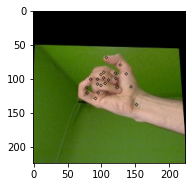

In [39]:
def postprocess_keypoints(keypoints):
    base_kp = keypoints[0:1]
    offset_1 = keypoints[1:6] + base_kp
    offset_2 = keypoints[6:11] + offset_1
    offset_3 = keypoints[11:16] + offset_2
    offset_4 = keypoints[16:] + offset_3
    return np.concatenate((base_kp, offset_1, offset_2, offset_3, offset_4))


NEW_KEYPOINTS_PATH = os.path.join(BASE_DATA_PATH, 'train_2d_keypoints_offsets.npz')
npz_file = np.load(NEW_KEYPOINTS_PATH, allow_pickle=True)
INDEX = 21176
img_name = all_img_paths[INDEX]
keypoints = npz_file[img_name]
full_img_path = os.path.join(TRAIN_IMAGES_PATH, img_name)
img = cv2.imread(full_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
processed_kp = postprocess_keypoints(keypoints)
print("PROCESSED KP", processed_kp)
plot_hand_for_test(img, processed_kp)
plt.subplot(1, 2, 1)
plt.imshow(img)